# 単線形回帰

# 前と同じコードを使い、以下の問題を解きましょう
    1. データの数を100,000に変えてみましょう
    2. データの数を1,000,000に変えてみましょう
    3. 学習率を変えてみましょう 
    4. 損失関数を変えてみましょう 
    5. L1ノルム損失を使ってみましょうL1ノルム損失は以下の通りです:
## $$ \Sigma_i = |y_i-t_i| $$
    6. f(x,z) = 13*xs + 7*zs - 12の場合でモデルを作成してみましょう

### ライブラリのインポート

In [2]:
#import numpy as np
import numpy as np

# matplotlib と mpl_toolkits は必須ではないですが、グラフを書く際に必要となります。  
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D

### 訓練させるためのランダムな入力データの作成

In [3]:
# まずは作成したいデータの数を入れた変数を作成します
#observations = 1000
observations = 100000
# 入力の変数は2つです
# 今回はそれをxとzとします
# その値は一様分布を使ってランダムに決めていきます。uniformメソッドの引数は3つです(low, high, size).
# xs と zs のサイズは1000 x 1です
#xs = np.random.uniform(low=-10, high=10, size=(observations,1))
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
#zs = np.random.uniform(-10, 10, (observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
# 2つの変数を一つの行列にします 
# column_stackは Numpy のメソッドであり、2つのベクトルを組み合わせて行列にします
#inputs = np.column_stack((xs,zs))
inputs = np.column_stack((xs,zs))
# 行列のサイズは n x kとなり、 n はデータの数を示しており、 k は変数の数を示しています。つまり、今回は1000 x 2となります。
#print (inputs.shape)
print (inputs.shape)

(100000, 2)


### ターゲットの作成

In [29]:
# ターゲットとする値にはランダムなノイズを加えます f(x,z) = 2x - 3z + 5 + <ノイズ>
noise = np.random.uniform(-1, 1, (observations,1))

# f(x,z) = 2x - 3z + 5 + noise の式を使ってターゲットを作成します
# ここでは、重みはそれぞれ2と-3となり、バイアスは5です
#targets = 2*xs - 3*zs + 5 + noise
targets = 3*xs + 4*zs - 5+ noise

# 念の為、ターゲットのサイズを確認しておきましょう。今回の場合はn x mであり、mは出力の数ということから1000 x 1となります
print (targets.shape)

(100000, 1)


### 訓練データのプロット

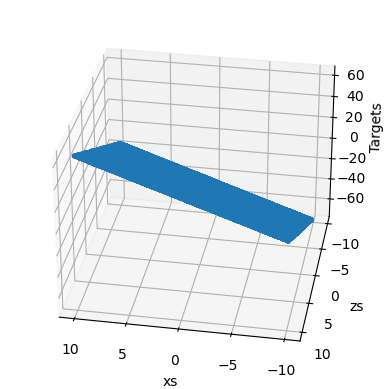

In [30]:
# 3D plotを使うためにはオブジェクトはある形状でなければいけないことから、reshapeメソッドを使っていきます
#targets = targets.reshape(observations,)
targets = targets.reshape(observations,1)
# matplotlib.pyplotを使って散布図を作成していきます

# 変数を宣言します
fig = plt.figure()

# 3dのグラフを作成するためのメソッドを書いていきます
ax = fig.add_subplot(111, projection='3d')

# 軸を選びます
ax.plot(xs, zs, targets)

# ラベルに名前を付けます
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# azimの値を変えることで、グラフをどこから見るのかという点を変更することができます
ax.view_init(azim=100)

# 実際に散布図を表示していきます 
plt.show()


# ターゲットの形状を元に戻していきます
targets = targets.reshape(observations,1)

### 変数の初期化

In [26]:
# 重みとバイアスを、ある範囲でランダムに決めていきます
# その範囲を決める変数としてinit_rangeを定義します
init_range = 0.1

# 重みのサイズは k x mであり k は入力の数、 m は出力の数です
# 今回の場合においては、重みの行列は2x1となります。
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# バイアスのサイズは1であり、スカラーとなります
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#初期化の結果を確認してみましょう
print (weights)
print (biases)

[[-0.0694222 ]
 [ 0.08523977]]
[-0.04228422]


### 学習率の設定

In [31]:
# 今回の例では、学習率が0.02だと非常に良く機能します。
learning_rate = 0.02


### モデルの訓練

In [32]:
# 今回は繰り返しの回数は100回とします
for i in range (1000):
    
    # y = xw + b の線形モデルの等式です
    outputs = np.dot(inputs,weights) + biases
    # デルタは出力とターゲットの差を示しています
    # ここではデルタは1000x1のベクトルです
    deltas = outputs - targets
        
    # L2ノルム損失を使って損失の計算をしていきます。値を2で割っていますが、これは最小値を見つけるという意味では影響はありません。
    # また、コードを一般化させるためにデータの数で割っています。
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # それぞれの繰り返しにおける損失関数の値を出力します.
    print (loss)
    
    # 損失関数の場合と同じように、デルタに関してもデータの数で割っていきます
    deltas_scaled = deltas / observations
    
    # 勾配降下法のアルゴリズムを適用していきます
    # 重みは2x1, 学習率は1x1 (scalar), 入力は1000x2, デルタは1000x1となります
    # 演算を適切に行うために、入力の転置を取ります
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

1846.3426260012725
224.00446712937392
44.78990014007214
24.29036433943936
21.275043982643286
20.212582180791173
19.39382707319204
18.629670114213116
17.89821250470443
17.195988610203145
16.521602023458474
15.873924134553315
15.251894400234681
14.654496845546763
14.080756010603157
13.529735094473928
13.000534396612215
12.49228984464652
12.004171583183236
11.535382618790587
11.085157518673336
10.652761160883214
10.237487534020834
9.838658584469083
9.455623109275603
9.087755692876703
8.734455685926566
8.395146224564485
8.069273288518756
7.7563047965091885
7.455729737471462
7.167057336184599
6.889816251939265
6.623553808938524
6.367835257174442
6.122243062573651
5.886376225252918
5.659849624771507
5.44229339131132
5.233352301758061
5.0326851996973305
4.839964438378679
4.654875345738082
4.477115710605269
4.30639528925712
4.142435331511286
3.9849681255863834
3.833736560985511
3.688493708689426
3.549002417973911
3.4150349291930167
3.286372501895957
3.1628050576703908
3.044130837129035
2.93015

0.16595245621867089
0.165952456216593
0.16595245621459734
0.1659524562126807
0.16595245621083995
0.16595245620907215
0.16595245620737434
0.16595245620574373
0.1659524562041777
0.16595245620267374
0.16595245620122925
0.16595245619984203
0.1659524561985097
0.16595245619723012
0.1659524561960013
0.16595245619482107
0.16595245619368754
0.16595245619259893
0.16595245619155347
0.16595245619054935
0.16595245618958504
0.16595245618865892
0.16595245618776946
0.16595245618691523
0.16595245618609478
0.16595245618530682
0.1659524561845501
0.16595245618382334
0.1659524561831254
0.16595245618245502
0.16595245618181126
0.16595245618119298
0.16595245618059914
0.1659524561800288
0.16595245617948112
0.1659524561789551
0.1659524561784499
0.1659524561779647
0.1659524561774987
0.16595245617705118
0.16595245617662138
0.16595245617620863
0.16595245617581214
0.1659524561754314
0.16595245617506574
0.1659524561747146
0.1659524561743773
0.16595245617405338
0.1659524561737423
0.1659524561734435
0.1659524561731565

### 重みとバイアスの出力

In [33]:
# 重みとバイアスの値が適切かどうか確認しましょう。（重みは2と-3、バイアスは5でした。）
print (weights, biases)

[[2.9998345 ]
 [3.99989829]] [-5.00055037]


### 出力とターゲットの図示
出力とターゲットを散布図に示し、もしその直線が45度に近ければ、正しい（出力とターゲットの値が同じに近い）ということができます。

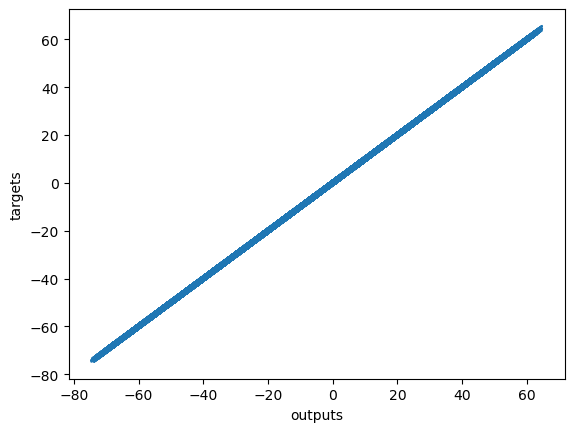

In [34]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()